In [2]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [5]:
# importing data
df = pd.read_csv('Dataset.csv')

print(df.head())
print(df.columns)

        Date   Period  Avg_Speed  Avg_Volume  Mean Pressure (hPa)  \
0  1/12/2021  0:00:00      69.34        0.71               1018.4   
1  1/12/2021  1:00:00      70.79        0.60               1018.4   
2  1/12/2021  2:00:00      68.66        0.34               1018.4   
3  1/12/2021  3:00:00      69.97        0.32               1018.4   
4  1/12/2021  4:00:00      69.31        0.32               1018.4   

   Air Temp Max (¬∞C)  Air Temp Mean (¬∞C)  Air Temp Min (¬∞C)  \
0                24.6                 21.3                17.1   
1                24.6                 21.3                17.1   
2                24.6                 21.3                17.1   
3                24.6                 21.3                17.1   
4                24.6                 21.3                17.1   

   Mean Dew Point (¬∞C)  Mean Rel Humidity (%)  Mean Cloud (%)  Rainfall (mm)  \
0                  13.0                     59              21            0.0   
1                  13.0   

The LinearRegression().fit(X,y) function will convert all datatypes in covariate X and response y into float. Since the column 'AQHI' and 'Period' contains data that is not convertable to float type, we have to run the two blocks of code below to represent the non-convertible data with a float(integer) value.

In [ ]:
# convert 'AQHI' data type from string to float
for i in range(len(df['AQHI'])):
  try:
    df['AQHI'][i] = float(df['AQHI'][i])
  except Exception as e:
    #AQHI value of '10+' is represented with float(11)
    print(e)
    df['AQHI'][i] = float(11)

In [ ]:
# convert 'Period' data type from object to float
for i in range(len(df['Period'])):
  try:
    period = df['Period'][i].split(":")[0] # convert "%H:%M:%S" format to "%H" 24-hour format
    df['Period'][i] = float(period)
  except Exception as e:
    print(e)
print(df['Period'])

The 5 blocks of code generate graphs to help visualize the relationship between different factors influencing the AQHI and the AQHI values, allowing for observations of any potential patterns or correlations.

<Axes: xlabel='Period', ylabel='AQHI'>

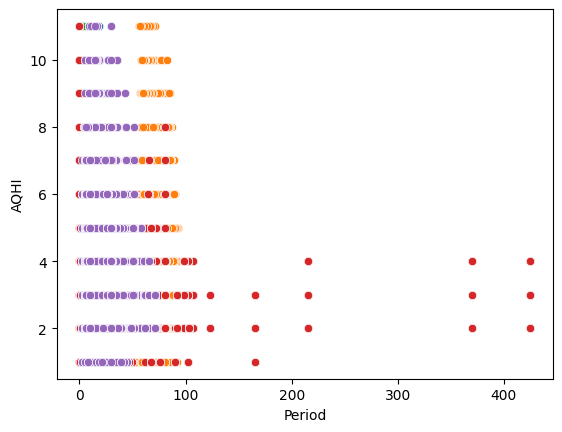

In [8]:
# plotting a scatterplot between Period and AQHI
sns.scatterplot(x='Period', y='AQHI', data=df)

<Axes: xlabel='Avg_Speed', ylabel='AQHI'>

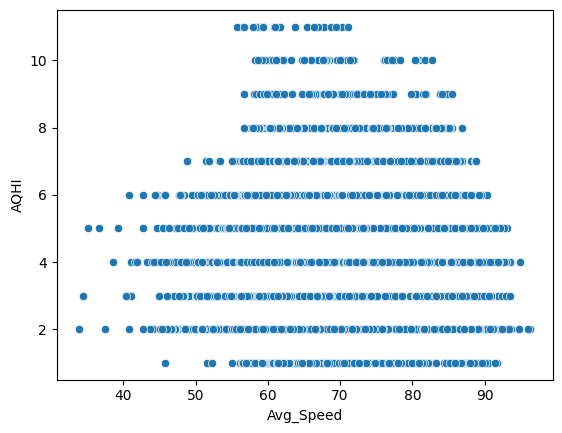

In [9]:
# plotting a scatterplot between Avg_Speed and AQHI
sns.scatterplot(x='Avg_Speed', y='AQHI', data=df)

<Axes: xlabel='Avg_Volume', ylabel='AQHI'>

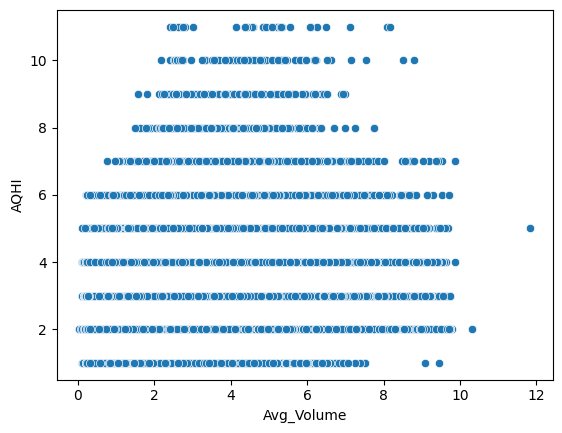

In [10]:
# plotting a scatterplot between Avg_Volume and AQHI
sns.scatterplot(x='Avg_Volume', y='AQHI', data=df)

<Axes: xlabel='Rainfall (mm)', ylabel='AQHI'>

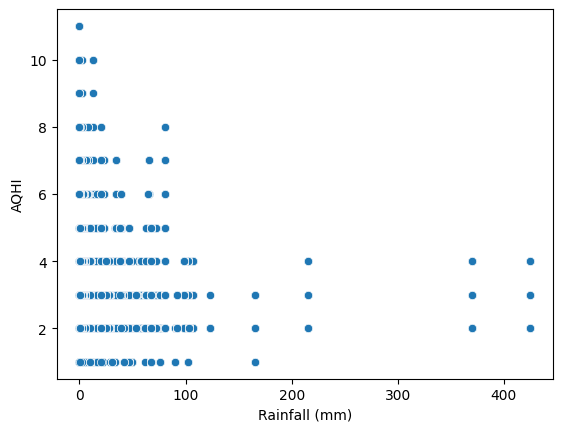

In [11]:
# plotting a scatterplot between Rainfall and AQHI
sns.scatterplot(x='Rainfall (mm)', y='AQHI', data=df)

<Axes: xlabel='Wind Speed (km/h)', ylabel='AQHI'>

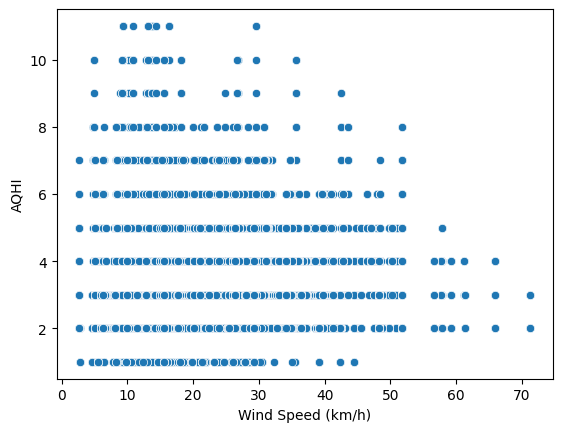

In [12]:
# plotting a scatterplot between Wind Speed and AQHI
sns.scatterplot(x='Wind Speed (km/h)', y='AQHI', data=df)

In [13]:
# creating feature variables
X = df.drop(['AQHI', 'Date'],axis= 1)
y = df['AQHI']
print(X)
print(y)

      Period  Avg_Speed  Avg_Volume  Mean Pressure (hPa)  Air Temp Max (¬∞C)  \
0        0.0      69.34        0.71               1018.4                24.6   
1        1.0      70.79        0.60               1018.4                24.6   
2        2.0      68.66        0.34               1018.4                24.6   
3        3.0      69.97        0.32               1018.4                24.6   
4        4.0      69.31        0.32               1018.4                24.6   
...      ...        ...         ...                  ...                 ...   
85134   19.0      72.61        4.28               1017.3                18.1   
85135   20.0      73.29        3.62               1017.3                18.1   
85136   21.0      72.20        3.68               1017.3                18.1   
85137   22.0      73.18        3.17               1017.3                18.1   
85138   23.0      74.25        2.51               1017.3                18.1   

       Air Temp Mean (¬∞C)  Air Temp Mi

In [14]:
# creating train and test sets where 80% of the data is used for training, and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
# creating a regression model
model = LinearRegression()

In [ ]:
# fitting the model
model.fit(X_train,y_train)

In [17]:
# making predictions
predictions = model.predict(X_test)

In [18]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.1898870944101767
mean_absolute_error :  0.84693938884456


The code below is used to visually compare the actual values ('y_test') with the predicted values ('predictions') for a specific variable, in this case, 'Wind Speed (km/h)'.

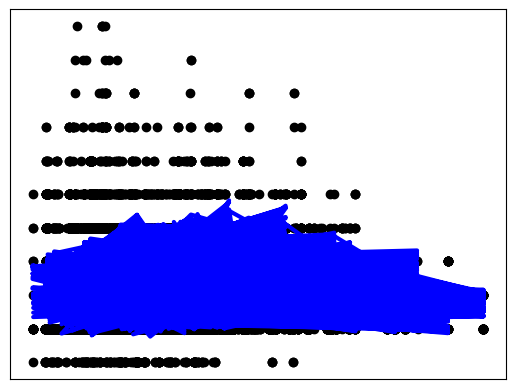

In [19]:
# Plot outputs
plt.scatter(X_test['Wind Speed (km/h)'], y_test, color="black")
plt.plot(X_test['Wind Speed (km/h)'], predictions, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()